## Part 1 of TDQM coursework

In [1]:
# # # imports # # #
%pylab qt
%run tdqm_functions

Populating the interactive namespace from numpy and matplotlib


The power spectrum through a vibronic transition is, due to simplifications that follow the Born-Oppenheimer approximation, the vibrational wavepacket on the ground state multiplied by the transition dipole moment, moving on the excited state potential energy surface.

Create light purterbed power spectrum for ground state

$\sigma (\omega ) = \frac{2\pi \omega}{2 \hbar c} \int_{- \infty}^{\infty} \langle \varphi(0) | e^{\frac{-i \hat{H}_2 t}{\hbar}} | \varphi(0) \rangle \: e^{i (\frac{E_i}{\hbar}+\omega)} \,dt $

Where $\varphi(t)$ is equal to $\underline{\mu}(x,t) \psi(x,t)$, and $E_i$ is the vibronic transition??

We are looking at the autocorrelation function between the ground state and excited state vibrations.

Could we get power spectra of the dipole operated ground state, and wavepacket made up of the first few eigenstates of the excited state, then use these power spectra to take the difference, thereby getting the vibrational transition energies between electronic states? 

NOTE:
The resolution &Delta;&omega; of the frequency grid depends on the total length of the time interval (the time range), so if N is the number of points in the time grid and &Delta;t the spacing between them, then

$$\Delta\omega=\frac{\sqrt{2\pi}}{N \Delta t}.$$

The range of the frequency grid, spanning from \[-&Omega;,&Omega;\] depends on the resolution of the time grid:

$$\Omega=\frac{\sqrt{\pi}}{\Delta t}.$$

#### Trial 0: - testing

Finding the power spectrum of the ground state with the 0th eigenstate, 

and the power spectrum of the excited state, for a wavepacket made up of multiple eigenstates

In [ ]:
# initiate class on ground electronic state potential
trial0_g = Wavepkt(timestep = 0.05, nsteps = 1000, xmin = -25, xmax = 25, spacesteps= 5000, m = 1, estate='ground')

# starting wf - 0th eigenstate 
trial0_g.initialise_wf_eigen([0])

# propagate wf - build time dependant behaviour
trial0_g.propagate_wf()

# check simulation health
animate_dynamics(trial0_g.x_grid,trial0_g.wf_dynamics,trial0_g.dt,V_harm(trial0_g.x_grid,trial0_g.x0,trial0_g.k))

# NOTE: can see that wavepacket is oscillating slightly - Re part not standing wave!

In [ ]:
# find power series using autocorrelation function and multiplied by dipole moment
trial0_g.powerseries_lp()

# find the peak position
trial0_g.find_peak(trial0_g.x_grid[0],trial0_g.x_grid[-1])
trial0_g.fpeaks

In [ ]:
# initiate class on excited electronic state potential
trial0_e = Wavepkt(timestep = 0.1, nsteps = 500, xmin = -25, xmax = 25, spacesteps= 1000, m = 1, estate='excited')

# starting wf - superposition of multiple eigenstates,
# simulating a coherent transition to multiple energy levels
trial0_e.initialise_wf_eigen([0,1,2,3])

# propagate wf - build time dependant behaviour
trial0_e.propagate_wf()

# check simulation health
animate_dynamics(trial0_e.x_grid,trial0_e.wf_dynamics,trial0_e.dt,V_harm(trial0_e.x_grid,trial0_e.x0,trial0_e.k))

In [ ]:
# find the power series of the light purtibated wf
trial0_e.powerseries_lp()

# find the peaks
trial0_e.find_peak(trial0_e.x_grid[0],trial0_e.x_grid[-1])
trial0_e.fpeaks

In [ ]:
# plot the transition dipole moment - test
plt.plot(trial0_e.x_grid,tdp(trial0_e.x_grid))

However, this doesn't really give a time dependant picture. This just gives a before and after, much like the non-time dependant description previously taught but with TD wavepackets.

Instead, to simulate a system in which the nuclear wavepacket is transposed onto the excited electronic potential, an autocorrelation function for the wavepacket BETWEEN the potentials could be found.

So, I need a gaussian wp on the ground state, and it's autocorrelation function with motion on the excited state.

#### First trial:

For this, the 0th vibrational eigenstate for the ground state (a gaussian) is projected onto the excited electronic state. This gaussian wavepacket from the ground state then propagates on the new potential.

Find autocorrelation function between this and the propagation, both multiplied by $\mu$ (in autocorrelation but not before)

In [ ]:
# create the ground state 0th vibration
ground_1st = Wavepkt(timestep = 0.1, nsteps = 5000, xmin = -15, xmax = 30, spacesteps= 20000, m = 1, estate='ground')

In [ ]:
# set the initial wf with the eigenstates of the harmonic potential
ground_1st.initialise_wf_eigen([0])

# propagate these through the timesteps, on the other potential
ground_1st.propagate_other(ground_1st.x0_e,ground_1st.k_e)

In [ ]:
# visualise
animate_dynamics(ground_1st.x_grid,ground_1st.wf_dynamics,ground_1st.dt,V_harm(ground_1st.x_grid,ground_1st.x0_e,ground_1st.k_e))

In [ ]:
# look at power series for this treatment
ground_1st.powerseries_lp()

In [ ]:
# save it!
ground_1st.save('trial1')

In [ ]:
# load
ground_1st.load('trial1')

In [ ]:
# find the peaks
ground_1st.find_peak(0.15,0.175)
ground_1st.fpeaks

In [ ]:
# zero point energy
print('Zero point energy (excited state):', ground_1st.fpeaks[0][0])
print()

# average peak separation and std
for i in range(len(ground_1st.fpeaks)-1):
    peak_separation = ground_1st.fpeaks[i+1] - ground_1st.fpeaks[i]

print('Mean peak separation:', np.mean(peak_separation))
print('STD:', np.std(peak_separation))

So, with this treatment, the power spectrum is:

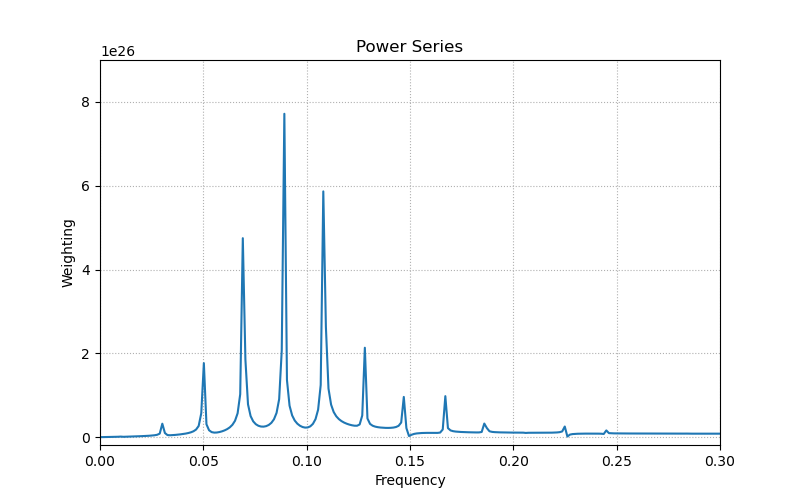

In this contains the vibrational energies of the excited electronic state and the frank condon factor 

The first peak (the zero point energy of the excited state) is $f_0 = 0.0289$

The average separation of peaks (expect same for harmonic oscillator) is $0.0188$, with an STD of $0.0000$

To find the absorbtion spectrum using this power spectrum. The energy scale must be shifted by (+) the 'core' energy of the electronic transition, $0.0718 E_h$ and (-) the zero point energy of the ground state potential $f_0 = 0.01255382$ (?) that is promoted from.

To confirm the frank-condon factor, the inner product between different eigenstates can be found.

##### PROBLEMS:

1) tdp may not work for shifted potentials, will need to return potentials or shift tdp
   
1) b) Does the wavepacket need multiplying by the dipole before propagation?? Instead of just during autocorrellation function

2) Although told to use harmonic potential for ground state, need to propagate onto rydberg.

3) What should I use as the mass of the system?

    Note: With too low a mass, the rydberg potential cannot contain the wavepacket

In [ ]:
# transition dipole moment
# how to shift??
x_for_tdp = np.linspace(3,10,1000)

plt.subplot(3, 1, 1)
plt.plot(x_for_tdp,tdp(x_for_tdp))

plt.subplot(3, 1, 2)
plt.plot(x_for_tdp,tdp(x_for_tdp+x0_g))

plt.subplot(3, 1, 3)
x_for_eigen = np.linspace(0,10,1000)
plt.plot(x_for_eigen,eigen_ho(x_for_eigen-x0_g,v=0,m=1,k=De_g * delt_g**2))

# NOTE: code now changed to shift eigenvalue initialisation, for correspondance with dipole

In [ ]:
# comparing harmonic and rydberg potentials
x_for_harm = np.linspace(-15,20,1000)

plt.subplot(2, 1, 1)
plt.plot(x_for_harm, V_harm(x_for_harm, x0_e-x0_g, De_e * delt_e**2)+Te)
plt.plot(x_for_harm, V_rydberg(x_for_harm))
plt.ylim(Te,Te+0.2)
plt.xlim(-5,5)
plt.grid(linestyle=':')

plt.subplot(2, 1, 2)
plt.plot(x_for_harm, V_harm(x_for_harm, 0, De_g * delt_g**2))
plt.ylim(0,0.2)
plt.xlim(-5,5)
plt.grid(linestyle=':')

##### Second Trial:

Using the rydberg potential to propagate the wavefunction, although still using the gaussian wavepacket from the eigenfunction of v = 0 on the ground state harmonic

In [ ]:
# ground state wavefunction - v=0 eigenfunction of harmonic 
# for now, trial of shorter time and larger spacestep
ground_2nd = Wavepkt(timestep = 0.1, nsteps = 25000, xmin = 0, xmax = 50, spacesteps= 5000, m = 127*2, estate='ground')

# set the initial wf with the eigenstates of the harmonic potential
ground_2nd.initialise_wf_eigen([0])
# for gwp initialisation:
# ground_2nd.initialise_wf_gwp([0.0, 0.1, (ground_2nd.m * ground_2nd.k)**0.5 /2, 0.0])

In [ ]:
# propagate these through the timesteps, on the other potential
ground_2nd.propagate_rydberg()

# look at power series for this treatment
ground_2nd.powerseries_lp()

In [ ]:
# visualise
animate_dynamics(ground_2nd.x_grid,ground_2nd.wf_dynamics,ground_2nd.dt,V_rydberg(ground_2nd.x_grid),frame_delay=0.001)

##### Second Trial (b): Multiplying WF by tdp BEFORE propagation

create new method in Wavepkt class that does this

In [ ]:
# ground state wavefunction - v=0 eigenfunction of harmonic 
# for now, trial of shorter time and larger spacestep
ground_2b = Wavepkt(timestep = 1.5, nsteps = 8000, xmin = 0.001, xmax = 110, spacesteps= 8000, m = 127*2, estate='ground')

# set the initial wf with the eigenstates of the harmonic potential
ground_2b.initialise_wf_eigen([0])

In [ ]:
# propagate these through the timesteps, on the other potential
ground_2b.propagate_rydberg_tdp()

In [ ]:
# visualise
animate_dynamics(ground_2b.x_grid,ground_2b.wf_dynamics,ground_2b.dt,V_rydberg(ground_2b.x_grid),frame_delay=0.001)

# NOTE: can see effect of transition dipole moment on WP 

In [ ]:
# look at power series for this treatment
ground_2b.powerseries()

Method '2b', multiplying by tdp before propagation, appears to give the same power spectrum as '2a' method,
###### this method is faster!
BUT how to have sufficiently long time for good resolution, without developing edge artifacts due to escaping WP?
- escaping WP error or true? - could this be from 'misaligned' initial WP on harmonic? (ie. from slight oscillation)

- could this be due to a too light mass, therefore resolution acheived by using the high proton mass and as such long timescale, even if number of oscillation cycles are few (avoiding the edge artifacts at longer time)

##### Trial: HEAVY (i.e. correct mass!)

Using mass of $I^{127}_2$ in terms of electron mass reduced units

Might need to use reduced mass for the oscillator, 

$ \hspace{5cm}   m_{eff} = \frac{m_1 m_2}{m_1 + m_2} $

$ \hspace{5cm} $ In which case ...

$ \hspace{5cm}   m_{eff} = \frac{ 127^2 }{2 \bullet 127} = \frac{127}{2} \frac{m_p}{m_e} \approx \frac{127}{2} \bullet 1836 $

In [2]:
# ground state wavefunction - v=0 eigenfunction of harmonic 
heavy = Wavepkt(timestep = 2.0, nsteps = 50000, xmin = 2, xmax = 100, spacesteps= 5000, m = 127/2 * proton_mass_ratio, estate='ground')

# set the initial wf with the eigenstates of the harmonic potential
heavy.initialise_wf_eigen([0])

In [3]:
# propagate these through the timesteps, on the other potential
heavy.propagate_rydberg_tdp()

In [ ]:
# visualise
animate_dynamics(heavy.x_grid,heavy.wf_dynamics,heavy.dt,V_rydberg(heavy.x_grid),frame_delay=0.00001)

# NOTE: can see artifacts

In [4]:
# calculate autocorrelation
heavy.calc_autocorrelation()

# look at autocorrelation
heavy.plot_autocorrelation()

C:\Users\44775\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [5]:
# calculate power series
heavy.calc_powerseries()
# look at power series
heavy.plot_powerseries()

In [6]:
# calculate absorbtion
heavy.calc_absorbtion(E_zeropoint = 0.0113086)
# look at absorbtion
heavy.plot_absorbtion()

##### PART B: Finding the zero point energy of the ground state

##### ATTEMPT A:
- harmonic approximation
- using eigenvalue solver
- find SINGULAR value on power spectrum

'Core' electronic energy difference more simple - difference in 'Te'

In [ ]:
# ground state wavefunction - v=0 eigenfunction of harmonic 
zpe = Wavepkt(timestep = 1.0, nsteps = 1000, xmin = x0_g-10, xmax = x0_g+10, spacesteps= 2000, m = 127*2, estate='ground')

# set the initial wf with the eigenstates of the harmonic potential
zpe.initialise_wf_eigen([0])

# propagate wf - build time dependant behaviour
zpe.propagate_wf()

# check simulation health
animate_dynamics(zpe.x_grid,zpe.wf_dynamics,zpe.dt,V_harm(zpe.x_grid,zpe.x0,zpe.k))

NOTE: 
- can see that wavepacket is oscillating slightly - Re part not standing wave! ROUNDING ERRORS?
- some of the WP has y-axis of >1 ! - what is the y-axis? is this indicitive of poor health? NO

In [ ]:
# find power series using autocorrelation function and multiplied by dipole moment
zpe.powerseries_lp()

# find the peak position
zpe.find_peak(zpe.x_grid[0],zpe.x_grid[-1],name='zero point energy')
zpe.fpeaks

##### ATTEMPT B:
- eigenvalue solver using harmonic approximation
- propagate on ground state rydberg
- finding the FIRST value on the qausi-eigenfunction power spectrum (or absorbtion spectrum??)

this gives a more accurate zero point energy

In [ ]:
# ground state wavefunction - v=0 eigenfunction of harmonic 
zpe = Wavepkt(timestep = 1.0, nsteps = 20000, xmin = x0_g-10, xmax = x0_g+10, spacesteps= 4000, m = 127/2 * proton_mass_ratio, estate='ground')

# set the initial wf with the eigenstates of the harmonic potential
zpe.initialise_wf_eigen([0])

# propagate wf - build time dependant behaviour
zpe.propagate_rydberg_tdp_g()

# check simulation health
animate_dynamics(zpe.x_grid,zpe.wf_dynamics,zpe.dt,V_rydberg_g(zpe.x_grid),frame_delay=0.001)

In [ ]:
# find power series using autocorrelation function and multiplied by dipole moment
zpe.calc_autocorrelation()

zpe.calc_powerseries()

# plot power series
zpe.plot_powerseries()

# find the peak position
zpe.find_peak(zpe.x_grid[0],zpe.x_grid[-1],name='zero point energy')
zpe.fpeaks

### RESULT

##### PART B

The peak position, in the reduced units, is 0.0113086

The 'core' electronic energy (Te), from the minima of each adiabatic potential energy curves, is 0.168

$\therefore$ the 'SHIFTING' freqency, to go from the power to absorbtion spectrum is $0.168 - 0.011$

###### 0.6066914

##### PART A